## Observations and Insights 

Observation and Insights 1:
The male/female distribution among different drug regimen is fairly balanced. The data suggests that we need a balanced gender distribution to get a valid test result.

Observation and Insights 2:
Among the four major drug regimen that we've selected, almost all tumor volumes are within the reasonable range. There are only one outlier (in the group 'Infubinol') among these four groups.

Observation and Insights 3:
The line plot suggests that the tumor volumes become smaller over timepoints, which indicates the effectiveness of the drug groups. 

Observation and Insights 4:
There are positive correlation between weight and tumor volumes. The data suggests that the tumor volumes get bigger as the weights get bigger. 

## Code and Visual Representations

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

In [3]:
# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)

In [4]:
# Read the study results
study_results = pd.read_csv(study_results_path)

In [5]:
# Combine the data into a single dataset
# Display the data table for preview
study_df = mouse_metadata.merge(study_results, how='outer')
study_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Checking the number of mice.
total_mice = mouse_metadata['Mouse ID'].count()
total_mice

249

In [7]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# drop the duplicated timepoint
duplicate = study_df[study_df.duplicated()] 
duplicate

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.0,0


In [8]:
# drop the duplicated timepoint by index number
# Create a clean DataFrame by dropping the duplicate mouse by its ID
clean_study_df = study_df.drop(909)
clean_study_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [9]:
# Checking the number of mice in the clean DataFrame.
new_mice_number = clean_study_df['Mouse ID'].unique()
mice_count = len(new_mice_number)

## Summary Statistics

In [10]:
# group by drup regimen
drug_regimen_group = clean_study_df.groupby('Drug Regimen')

# calcuate mean, median, variance, standard deviation, and SEM of the tumor volume for each group
average = drug_regimen_group['Tumor Volume (mm3)'].mean()
average_df = pd.DataFrame(average)

median = drug_regimen_group['Tumor Volume (mm3)'].median()
median_df = pd.DataFrame(median)

variance = drug_regimen_group['Tumor Volume (mm3)'].median()
variance_df = pd.DataFrame(variance)

sem = drug_regimen_group['Tumor Volume (mm3)'].sem()
sem_df = pd.DataFrame(sem)

In [11]:
# create summary statistics dataframe
summary1 = pd.merge(average_df, median_df, how='outer', on='Drug Regimen')
summary2 = summary1.rename(columns={'Tumor Volume (mm3)_x':'Average', 'Tumor Volume (mm3)_y':'Median'})
summary3 = pd.merge(summary2, variance_df, how='outer', on='Drug Regimen')
summary4 = pd.merge(summary3, sem_df, how='outer', on='Drug Regimen')

summary5 = summary4.rename(columns={'Tumor Volume (mm3)_x':'Variance', 'Tumor Volume (mm3)_y':'SEM'})
statistics_summary = summary5.round(2)

statistics_summary

,Average,Median,Variance,SEM
Drug Regimen,,,,
Capomulin,40.68,41.56,41.56,0.33
Ceftamin,52.59,51.78,51.78,0.47
Infubinol,52.88,51.82,51.82,0.49
Ketapril,55.24,53.70,53.70,0.60
Naftisol,54.33,52.51,52.51,0.60
Placebo,54.03,52.29,52.29,0.58
Propriva,52.37,50.91,50.91,0.51
Ramicane,40.22,40.67,40.67,0.32
Stelasyn,54.23,52.43,52.43,0.57


## Bar and Pie Charts

In [12]:
# group by drup regimen
drug_regimen_group = clean_study_df.groupby('Drug Regimen')
total_mice = drug_regimen_group['Mouse ID'].count()
total_mice_df = pd.DataFrame(total_mice)
total_mice_df2 = total_mice_df.rename(columns={'Mouse ID':'Total Number of Mice'})
total_mice_df2

,Total Number of Mice
Drug Regimen,
Capomulin,230
Ceftamin,178
Infubinol,178
Ketapril,188
Naftisol,186
Placebo,181
Propriva,160
Ramicane,228
Stelasyn,181


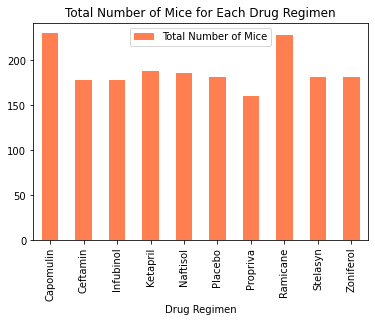

In [13]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
total_mice_df2.plot(kind='bar', color='coral', title ='Total Number of Mice for Each Drug Regimen')

Text(0, 0.5, 'Total Number of Mice')

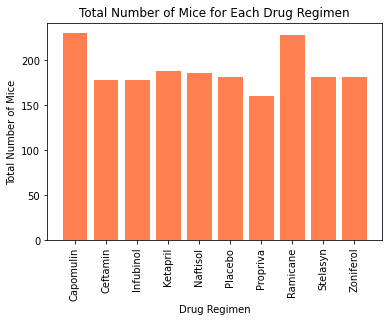

In [14]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.

total_mice_df2

x_axis = total_mice_df2.index
y_axis = total_mice_df2['Total Number of Mice']

plt.bar(x_axis, y_axis, color='coral', align='center')
plt.xticks(rotation='vertical')

# set title and labels
plt.title('Total Number of Mice for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Total Number of Mice')

## Gender Distribution

In [15]:
clean_study_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [16]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
# total number of male grouped by drup regimen
male = clean_study_df.loc[(clean_study_df['Sex'] == 'Male')]
grouped_male = male.groupby('Drug Regimen')
total_male = grouped_male['Sex'].count()
total_male_df = pd.DataFrame(total_male)
total_male_df1 = total_male_df.rename(columns = {'Sex': 'Male'})
total_male_df1

,Male
Drug Regimen,
Capomulin,102
Ceftamin,86
Infubinol,83
Ketapril,130
Naftisol,100
Placebo,79
Propriva,87
Ramicane,154
Stelasyn,74


In [17]:
female = clean_study_df.loc[(clean_study_df['Sex'] == 'Female')]
grouped_female = female.groupby('Drug Regimen')
total_female = grouped_female['Sex'].count()
total_female_df = pd.DataFrame(total_female)
total_female_df1 = total_female_df.rename(columns = {'Sex': 'Female'})
total_female_df1

,Female
Drug Regimen,
Capomulin,128
Ceftamin,92
Infubinol,95
Ketapril,58
Naftisol,86
Placebo,102
Propriva,73
Ramicane,74
Stelasyn,107


In [18]:
# merge male count and female count to one data frame
gender_distribution_df = pd.merge(total_male_df1, total_female_df1, how='outer', on='Drug Regimen')
gender_distribution_df

,Male,Female
Drug Regimen,,
Capomulin,102,128
Ceftamin,86,92
Infubinol,83,95
Ketapril,130,58
Naftisol,100,86
Placebo,79,102
Propriva,87,73
Ramicane,154,74
Stelasyn,74,107


In [19]:
# Gender Distruction Pie Plot
gender_distribution_sum = gender_distribution_df.sum()
gender_distribution_df2 = pd.DataFrame(gender_distribution_sum).rename(columns={0:'Gender Distribution'})
gender_distribution_df2

,Gender Distribution
Male,958
Female,934


Text(0.5, 1.0, 'Gender Distribution')

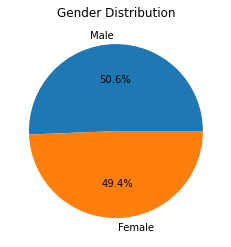

In [20]:
# Gender Distribution Pie Plot using Matplotlib
plt.pie(gender_distribution_df2['Gender Distribution'], labels=gender_distribution_df2.index, autopct="%1.1f%%")
plt.title('Gender Distribution')

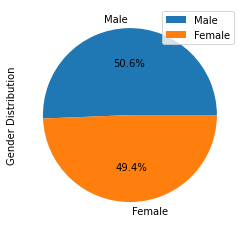

In [21]:
# Gender Distribution Pie Plot using Pandas
gender_distribution_df2.plot.pie(y='Gender Distribution', autopct="%1.1f%%")

<function matplotlib.pyplot.show(*args, **kw)>

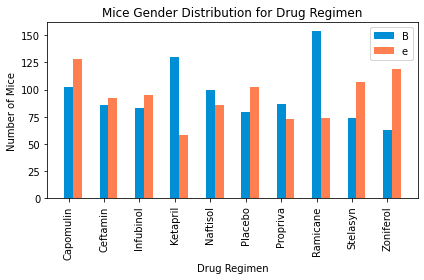

In [22]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# set x axis, y axis and bar width
x_axis = gender_distribution_df.index
x_indexes = np.arange(len(x_axis))
width = 0.25

# plot bar graph
y_male = gender_distribution_df['Male']
plt.bar(x_indexes, y_male, width=width, color='#008fd5', label='Male')

y_female = gender_distribution_df['Female']
plt.bar(x_indexes + width, y_female, width=width, color='coral', label='Female')

plt.xticks(ticks=x_indexes, labels=x_axis, rotation='vertical')
plt.legend('Best')
plt.title('Mice Gender Distribution for Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Mice')

plt.tight_layout()
plt.show

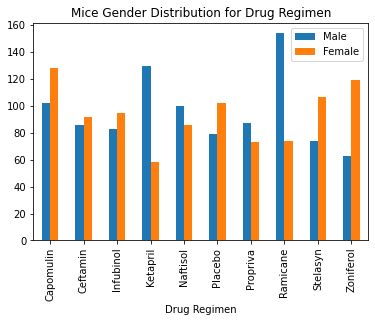

In [23]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_distribution_df.plot(kind='bar', title = 'Mice Gender Distribution for Drug Regimen')

## Quartiles, Outliers and Boxplots

In [24]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
regimen_ca = study_df.loc[study_df['Drug Regimen'] == 'Capomulin']
regimen_ra = study_df.loc[study_df['Drug Regimen'] == 'Ramicane']
regimen_in = study_df.loc[study_df['Drug Regimen'] == 'Infubinol']
regimen_ce = study_df.loc[study_df['Drug Regimen'] == 'Ceftamin']

combined_df1 = regimen_ca.append(regimen_ra)
combined_df2 = combined_df1.append(regimen_in)
four_regimens_df = combined_df2.append(regimen_ce)
four_regimens_df.head(11)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
15,s185,Capomulin,Female,3,17,25,33.949940,0
16,s185,Capomulin,Female,3,17,30,32.959671,1
17,s185,Capomulin,Female,3,17,35,28.328531,1
18,s185,Capomulin,Female,3,17,40,25.472143,1
19,s185,Capomulin,Female,3,17,45,23.343598,1


In [25]:
# Find the last timepoint
last_timepoint = four_regimens_df.groupby(['Drug Regimen','Mouse ID'])['Timepoint'].max()
last_timepoint_df = pd.DataFrame(last_timepoint)
last_timepoint_df.head()

Timepoint
Drug Regimen Mouse ID           
Capomulin    b128             45
             b742             45
             f966             20
             g288             45
             g316             45

In [26]:
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merged_df = four_regimens_df.merge(last_timepoint_df, on = ['Mouse ID','Timepoint'], how='inner')
result_df = merged_df[['Mouse ID','Drug Regimen','Tumor Volume (mm3)']]
result_df

,Mouse ID,Drug Regimen,Tumor Volume (mm3)
0,s185,Capomulin,23.343598
1,x401,Capomulin,28.484033
2,m601,Capomulin,28.430964
3,f966,Capomulin,30.485985
4,u364,Capomulin,31.023923
...,...,...,...
95,x226,Ceftamin,45.000000
96,x581,Ceftamin,64.634949
97,x822,Ceftamin,61.386660
98,y769,Ceftamin,68.594745


In [27]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = result_df['Drug Regimen'].unique()
treatment_list

# tumor vol data
tumor_volume = result_df['Tumor Volume (mm3)']

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles = tumor_volume.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of the tumor volume is: {lowerq}")
print(f"The upper quartile of the tumor volume is: {upperq}")
print(f"The interquartile range of the tumor volume is: {iqr}")
print(f"The the median of the tumor volume is: {quartiles[0.5]} ")

# Determine outliers using upper and lower bounds
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
   
# add subset 
result_df['Outliers'] = result_df['Tumor Volume (mm3)'] <= 3.0739668737499812 
result_df['Outliers'] = result_df['Tumor Volume (mm3)'] >= 94.04403868375002 

The lower quartile of the tumor volume is: 37.187743802499995
The upper quartile of the tumor volume is: 59.930261755000004
The interquartile range of the tumor volume is: 22.74251795250001
The the median of the tumor volume is: 45.0 
Values below 3.0739668737499812 could be outliers.
Values above 94.04403868375002 could be outliers.


<ipython-input-27-fa6ea7e78c87>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result_df['Outliers'] = result_df['Tumor Volume (mm3)'] <= 3.0739668737499812
<ipython-input-27-fa6ea7e78c87>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result_df['Outliers'] = result_df['Tumor Volume (mm3)'] >= 94.04403868375002


In [45]:
# get tumor volume in each drug regimen
grouped_tumor_volume = result_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].unique()
grouped_tumor_volume

Drug Regimen
Capomulin    [23.34359787, 28.48403281, 28.43096411, 30.485...
Ceftamin     [62.99935619, 45.0, 56.05774909, 55.74282869, ...
Infubinol    [67.97341878, 65.52574285, 57.03186187, 66.083...
Ramicane     [22.05012627, 29.12847181, 30.27623175, 30.564...
Name: Tumor Volume (mm3), dtype: object

Text(0.5, 0, 'Drug Regimen')

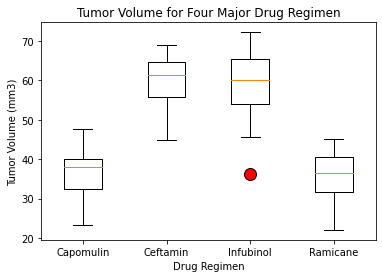

In [52]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
figl, axl = plt.subplots()
treatment_list = ['Capomulin', 'Ceftamin', 'Infubinol', 'Ramicane'] 
axl.boxplot(grouped_tumor_volume, labels = treatment_list, flierprops=orange_out)

axl.set_title('Tumor Volume for Four Major Drug Regimen')
axl.set_ylabel('Tumor Volume (mm3)')
axl.set_xlabel('Drug Regimen')

## Line and Scatter Plots

In [53]:
# select Capomulin from the drug regimen
filt3 = four_regimens_df['Drug Regimen'] == 'Capomulin'
Capomulin = four_regimens_df[filt3]
Capomulin.head()

# group by mouse id and timepoint
mice_timepoint_groups = Capomulin.groupby(['Mouse ID','Timepoint'])
Capomulin_tumor = mice_timepoint_groups['Tumor Volume (mm3)'].unique()

Capomulin_tumor_df = pd.DataFrame(Capomulin_tumor)
Capomulin_tumor_data = Capomulin_tumor_df['Tumor Volume (mm3)'].astype(float)
Capomulin_tumor_data_df = pd.DataFrame(Capomulin_tumor_data)
Capomulin_tumor_data_df

Tumor Volume (mm3)
Mouse ID Timepoint                    
b128     0                   45.000000
         5                   45.651331
         10                  43.270852
         15                  43.784893
         20                  42.731552
...                                ...
y793     25                  38.992734
         30                  35.726023
         35                  36.327870
         40                  31.475411
         45                  31.896238

[230 rows x 1 columns]

In [55]:
# identify specific mouse id
mouse_id = input('Type in the Mouse ID')

specific_mouse = Capomulin_tumor_data_df.loc[mouse_id]
specific_mouse

Type in the Mouse IDy793


,Tumor Volume (mm3)
Timepoint,
0,45.000000
5,41.019913
10,41.630010
15,42.283665
20,40.716428
25,38.992734
30,35.726023
35,36.327870
40,31.475411


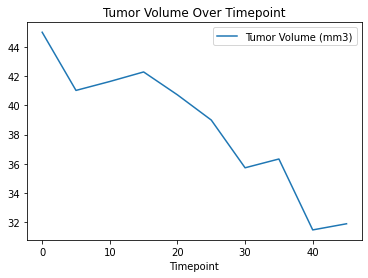

In [56]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
specific_mouse.plot(title = 'Tumor Volume Over Timepoint')
#specific_mouse.set_ylabel('Tumor Volume (mm3)')

In [57]:
Capomulin.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0


In [58]:
# Calcuate Average Tumor Volume
capomulin_groups = Capomulin.groupby('Mouse ID')
average_tumor_volume = capomulin_groups['Tumor Volume (mm3)'].mean()
average_tumor_volume_df = pd.DataFrame(average_tumor_volume)
avg_tumor_df = average_tumor_volume_df.rename(columns={'Tumor Volume (mm3)': 'Average Tumor Volumn'})

In [59]:
# Merge two dataframes
capomulin2 = pd.merge(Capomulin, avg_tumor_df, on='Mouse ID', how='inner')

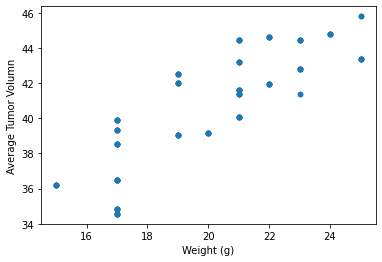

In [60]:
# Create scatter plot for weight and average tumor volumns
capomulin2.plot(kind='scatter', x='Weight (g)', y='Average Tumor Volumn')

## Correlation and Regression

In [67]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
from scipy.stats import linregress
import numpy as np
from sklearn import datasets

x_values = Capomulin['Weight (g)']
y_values = Capomulin['Tumor Volume (mm3)']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

The r-squared is: 0.2763600223455911


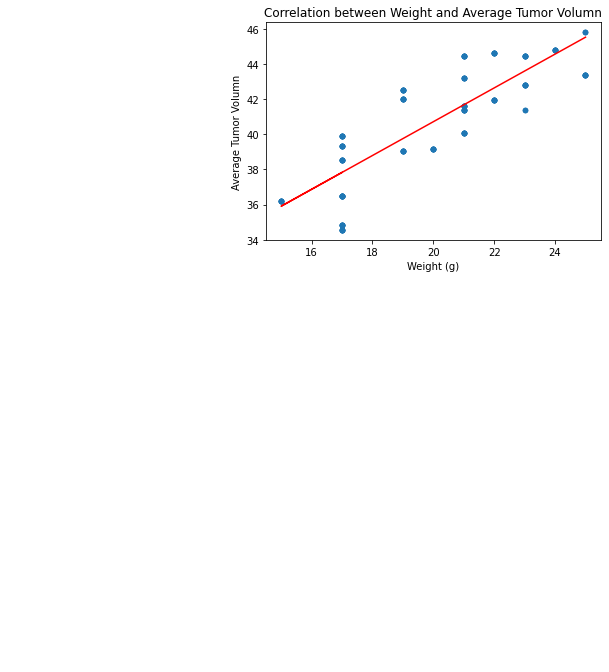

In [68]:
# plot regression
capomulin2.plot(kind='scatter', x='Weight (g)', y='Average Tumor Volumn')
plt.plot(x_values,regress_values,"r-")
plt.title ('Correlation between Weight and Average Tumor Volumn')

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(6,10), fontsize=15, color="red")
print(f"The r-squared is: {rvalue**2}")